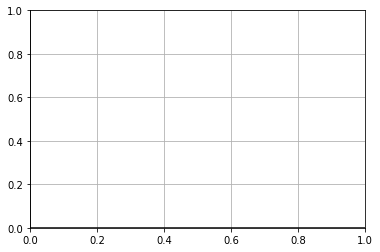

In [1]:
import sympy as smp
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [4]:
t = smp.symbols('t')

In [16]:
def li2np(*args):
    return [np.array(i) if isinstance(i, list) else i for i in args ]

def uxv(u, v):
    u, v = li2np(u, v)
    return np.cross(u, v)

def fstsec(u, v):
    V = uxv(u, v)
    L = np.linalg.norm(V)
    return (V/L, -V/L) if L else L

In [ ]:
fstsec([1, 0, 0], [1, 0, 0])

0.0

In [ ]:
fstsec([2, -2, -1], [1, 0, -1])

(array([0.66666667, 0.33333333, 0.66666667]),
 array([-0.66666667, -0.33333333, -0.66666667]))

In [ ]:
fstsec([2, -2, 4], [-1, 1, -2])

0.0

In [ ]:
def triar(p, q, r):
    p, q, r = li2np(p, q, r)
    pq = q - p
    pr = r - p
    V = uxv(pq, pr)
    L = np.linalg.norm(V)
    return L/2 , V/L

In [ ]:
triar([2, -2, 1], [3, -1, 2], [3, -1, 1])

(0.7071067811865476, array([-0.70710678,  0.70710678,  0.        ]))

In [ ]:
def boxprod(p, q, r):
    p, q, r = li2np(p, q, r)
    return np.linalg.det(np.stack([p, q, r]))

In [ ]:
boxprod([2, 0, 0], [0, 2, 0], [0, 0, 2])

7.999999999999998

In [ ]:
boxprod([2, 1, 0], [2, -1, 1], [1, 0, 2])

-6.999999999999999

In [6]:
def lineqn(p0, v):
    return smp.Matrix(p0) + t*smp.Matrix(v)

lineqn([1,1,1], [1,1,1])

Matrix([
[t + 1],
[t + 1],
[t + 1]])

In [10]:
isinstance(lineqn([-2,0,3], [3, 5, -2]), smp.Matrix)

True

In [13]:
def smpvec(*args):
    return [smp.Matrix(x) if isinstance(x, list) else x for x in args]



[Matrix([
 [1],
 [2],
 [3]]), Matrix([
 [  t],
 [2*t],
 [  3]])]

In [14]:
def vmod(x):
    return np.linalg.norm(x)

def distpt2l(p, s, v):
    p, s, v = li2np(p, s, v)
    ps = p - s
    psxv = uxv(ps, v)
    return vmod(psxv)/vmod(v)

In [17]:
distpt2l([0,0,12], [0,0,0], [4,-2,2])

10.954451150103324

In [18]:
2 * np.sqrt(30)

10.954451150103322